In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# COGS 118A - Project Checkpoint

# Names

- Zaki Ahmed
- Shay Samat
- Aditya Tomar
- Akhil Vasanth

# Abstract 
The goal of this project is to create a machine learning model that can predict whether an HB-1 visa will get certified or denied based on the company sponsoring the applicant. The dataset we are using for this project contains 25 columns of data spanning from 2011-2018 filed by various companies and contains features such as the employer and work’s state and location, as well as SOC code, information about wages, and many other relevant details. We will be performing EDA on this dataset to better understand which features are more or less important in determining whether an application is certified or denied. We plan on using ML models, Random Forest, Logistic Regression, SVM, and KNN to build a predictive model that can classify H1-B applications based on the sponsoring company. The success of our models will be measured by using F1 score and ROC-AUC with accuracy calculated for comparison purposes. 


# Background

H1-B visas is a very important program that allows companies in the U.S to hire specialized and talented foreign workers in technical positions<a name="mpinote"></a>[<sup>[1]</sup>](#mpinote). This is extremely important for companies when they want to fill key roles in their organizations. Though many people understand the importance of this visa type there are those who see threats. One of the biggest threats is that it can displace workers and depress wages. 
The USCIS provides a set of guidelines for applying for the H1-B and other Visa types but more importantly, it provides a set of rules that employers must follow. 
With many people from outside of the U.S. wanting to work here, there is plenty of demand for ways to predict if you can get an H1B visa. So, there has been some research that has aimed to predict whether an employee will have their H1B application certified or not. 
One research paper<a name="iqbalnote"></a>[<sup>[2]</sup>](#iqbalnote) used primarily characteristics about the employee and their job position to predict this. The features were the employee name, petition year, SOC code, job name, wage, full-time position(boolean), and work site. It used K-Means Clustering to analyze the dataset and tested two classifiers, Random Forest Classifier and Logistic Regression; it found that Logistic Regression classifies better with an accuracy score of 87%, while Random Forest Classifier had an accuracy score of 72%

Another research article<a name="rananote"></a>[<sup>[3]</sup>](#rananote) used characteristics of the applicant, the company, and industry they were to create a prediction model that accurately predicts whether an H1B application will be certified, denied, withdrawn or certified withdrawn. This research team used seven ML models including, Decision Tree, SVM, Neural Network, Linear Regression, Naive Bayes, Random Forest, and C5.0, as well as a machine ensemble method (combining all the models to make a better classifier). The models are trained and tested on applications/petitions from 2015 to 2017 and utilizes 20 features. These 20 features included information about the employer and worksite location, wages, H1-B dependence and SOC name (names for different occupation classifications). For all models, train test split is 70-30 and validation of the models is done with 10-fold cross validation. The results from this team states that C5.0 had best single model accuracy, 94.62%, but machine ensemble method had 95.4% accuracy.

Our final research paper<a name="paulnote"></a>[<sup>[4]</sup>](#paulnote) we found focuses on trying to come to a conclusion of why there was a surge in denial rates after the 2017 “Buy American and Hire American” Executive Order (EO). This article uses 4 ML models, Logistic Regression, XGBoost, Linear Discriminant, and Naïve Bayes. The validation of these models were computed through 5-fold cross validation. The model uses both firm and applicant characteristics. Applicant characteristic features span from education level (degree), occupation, and nationality. The firm features consist of the state in which they are in, the location of their headquarters, whether they are publicly traded, and H1 Dependent. Out of the 4 ML models used, it found that linearly dependent models outperformed XGBoost. Logistic Regression had the best accuracy, with 93% in the pre-treatment, and 82% in the post-treatment, Linear Discriminant had 91% in the pre-treatment and 81% in the post-treatment, Naïve Bayes had 92% in the pre-treatment and 81% in the post-treatment, and finally XGBoost had 90% in the pre-treatment and 80% in the post-treatment. Overall these results are fairly similar, however XGBoost takes into account potential non-linearities decision-boundaries, which is why for the rest of the paper they focused on the best linear model, logistic regression and also XGBoost.
In conclusion, the H1-B visa program is one of the most critical parts of the US economy because it allows foreign workers to fill in technical roles. Although we see this as a benefit, the program has received lots of criticism for some displacement of American workers and low wages. Due to this the USCIS created a list of guidelines to apply for the H1-B visa program. Based on these guidelines and access to the datasets, many machine learning models were created to predict the chance of approval for this visa. What makes our approach different is that we will be focusing on employer/company metrics, rather than employee/applicant metrics as focused on in the articles above. 

# Problem Statement

Problem statement: How accurately can we predict whether an H1B application will be certified or denied, based on the size, location, industry, and sales volume of the company sponsoring the employee and the details of the job being applied for (wage, job title, full time status)? What classifier can predict H-1B acceptance/denial with the greatest accuracy score? 


Our problem statement’s motivation is to find whether the metrics of the H1B sponsoring employer have a significant predictive value on approval odds of the H1B application and whether using this information can generate better predictions than not using them. All research data we have seen thus far do not use demographic/financial info of the company, rather they use demographic data from applicants. We think this is likely an oversight as H-1B applications are submitted by companies rather than individuals so we hypothesize company metrics might be more useful than individual demographic information in the context of H-1B applications.

# Data

Our primary dataset will be the H-1B Non-Immigrant Labour Visa dataset (Source: H-1B Non-Immigrant Labour Visa | Kaggle) which contains information on H-1B visa applications made by US employers with the primary feature of interest being “case_status” which includes approval or denial (or other) for each application. There are 3.36 million observations or applications with 25 variables/columns including information on employer location, job information (title, wage, full time for example)  for the prospective employee, and the dates of the application. To reiterate, the most important feature is the feature “case_status” which is stored as a categorical string encoding whether or not the case was approved. Following this, the next most important feature will be employer name because it will allow us to generate additional features with information on each company’s size, finances, and more. The boolean feature “emp_h1b_dependent” which encodes whether or not the employer is dependent on H-1B workers for its workforce will likely have an insignificant weight/impact on the prediction as there will likely be a correlation. We have not fully decided on the secondary dataset with information on employers but we have found one which crucially has information on “12 million companies” with features of note for our purposes being stock ticker, white collar percentage, employee number, annual sales, company age (ARC Dataset). These features and other features of companies will give our future trained model additional information to base predictions off of, hopefully improving prediction. To combine these datasets we would need to clean the company dataset of any missing values (either delete entire rows or use some imputation method) and then do an inner join on the company name features in both datasets. This will likely require some string manipulation as the same company could be written slightly differently across the two datasets. This join would ideally generate new columns for each application with extra information on the employer associated with the application (observation). 

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


# Evaluation Metrics

For the sake of being able to compare our H-1B classification models, we will be using accuracy as our first metric.  Accuracy is simply the proportion of correctly classified instances out of all instances in the dataset. Mathematically, it can be represented as: (TP + TN) / (TP + TN + FP + FN) However, accuracy will not be our primary metric for overall evaluation because the classes are imbalanced. Due to this we will be using F1-score and Area Under the ROC Curve (AUC-ROC) to evaluate overall performance. We feel the costs of false positives and false negatives are roughly equivalent in the context of our model being purely for analytical purposes and not for commercial use. The F1-score is the harmonic mean of precision and recall, and provides a balanced measure of the model's performance and can be represented as: T2 * (precision * recall) / (precision + recall). The AUC-ROC measures the performance of the model across all possible classification thresholds, and is useful when the threshold for classification is not known. In the context of H-1B visa application prediction, the goal will be to identify a threshold that maximizes both precision and recall since we assume them to be equally important. The AUC-ROC also measures the model's performance across all possible classification thresholds, and is calculated by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold values. The AUC-ROC provides a single number (between 0 and 1) that summarizes the model's performance across all thresholds, making it a useful metric for overall evaluation. F1-Score and AUC-ROC will be used for model evaluation while accuracy will primarily be used for comparison with past models with the same goal.

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



In [2]:
# Get a list of all the CSV files
csv_files = ["data/h1b_pt"+str(i)+".csv" for i in list(range(1,9))]

# Create an empty list to hold the DataFrames
dfs = []

# Loop through each CSV file, read it into a DataFrame, and append it to the list
for csv_file in csv_files:
    df = pd.read_csv(csv_file, low_memory=False)
    dfs.append(df)

# Concatenate all the DataFrames together into a single DataFrame
h1b = pd.concat(dfs, ignore_index=True)
h1b.head()

,case_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,emp_country,job_title,...,pw_level,wage_from,wage_to,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator,lat,lng
0,2017,C,2017-02-06,2017-02-10,"LAKELANDS NEPHROLOGY, PA",GREENWOOD,SC,29646,USA,NEPHROLOGIST,...,NaN,190000.00,0.0,Y,ABBEVILLE,SC,N,N,34.178172,-82.379015
1,2017,C,2017-03-21,2017-03-27,UNIVERSITY OF IDAHO,MOSCOW,ID,83844,USA,POST DOCTORAL FELLOW,...,Level I,47507.00,0.0,Y,ABERDEEN,ID,N,N,42.944078,-112.838326
2,2017,C,2017-03-17,2017-03-23,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,27265,USA,OPERATION ANALYST,...,Level I,65000.00,0.0,Y,ABERDEEN,MD,N,N,39.509556,-76.164120
3,2017,C,2017-03-10,2017-03-16,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,03431,USA,SR. INDUSTRIAL ENGINEER,...,Level II,86988.15,0.0,Y,ABERDEEN,MD,N,N,39.509556,-76.164120
4,2017,C,2017-08-04,2017-08-10,SANFORD CLINIC,SIOUX FALLS,SD,57117,NaN,HEMATOLOGIST/ONCOLOGIST,...,NaN,450000.00,0.0,Y,ABERDEEN,SD,N,N,45.464698,-98.486483


In [3]:
h1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360810 entries, 0 to 3360809
Data columns (total 25 columns):
 #   Column                Dtype  
---  ------                -----  
 0   case_year             int64  
 1   case_status           object 
 2   case_submitted        object 
 3   decision_date         object 
 4   emp_name              object 
 5   emp_city              object 
 6   emp_state             object 
 7   emp_zip               object 
 8   emp_country           object 
 9   job_title             object 
 10  soc_code              object 
 11  soc_name              object 
 12  full_time_position    object 
 13  prevailing_wage       float64
 14  pw_unit               object 
 15  pw_level              object 
 16  wage_from             float64
 17  wage_to               float64
 18  wage_unit             object 
 19  work_city             object 
 20  work_state            object 
 21  emp_h1b_dependent     object 
 22  emp_willful_violator  object 
 23  lat    

In [4]:
#make a bar chart 

#first, get all samples where the cases were certified and all samples where the cases weren't certified 

h1b_cert = df.loc[df['case_status'] == "C"]
h1b_noncert = df.loc[df['case_status'] != 'C']
h1b_grouped_year = h1b.groupby('case_year').count()['case_status']

<AxesSubplot:xlabel='case_year'>

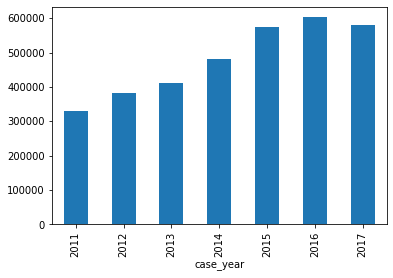

In [5]:
h1b_grouped_year.plot(kind='bar')

In [6]:
# we can view how many missing cases there are so far in each column to help identify what to drop and what to keep

h1b.isnull().sum()

case_year                     0
case_status                  15
case_submitted                0
decision_date                 0
emp_name                     81
emp_city                     58
emp_state                   123
emp_zip                      90
emp_country             1692680
job_title                    24
soc_code                    157
soc_name                  16538
full_time_position       602270
prevailing_wage             178
pw_unit                     221
pw_level                2346302
wage_from                    14
wage_to                 1723986
wage_unit                    61
work_city                     0
work_state                    0
emp_h1b_dependent       1604213
emp_willful_violator    1604212
lat                           0
lng                           0
dtype: int64

In [7]:
#create a new dataframe and drop columns that aren't of interest to us

drop_cols = [
     "emp_country",
    "pw_level", 
    "soc_name", 
    "wage_to", 
    "lat", 
    "lng"
]

data = h1b.drop(drop_cols, axis=1) 

cols = data.columns

data.head()

#now, check the missing values
data.isnull().sum()

case_year                     0
case_status                  15
case_submitted                0
decision_date                 0
emp_name                     81
emp_city                     58
emp_state                   123
emp_zip                      90
job_title                    24
soc_code                    157
full_time_position       602270
prevailing_wage             178
pw_unit                     221
wage_from                    14
wage_unit                    61
work_city                     0
work_state                    0
emp_h1b_dependent       1604213
emp_willful_violator    1604212
dtype: int64

In [8]:

data_clean = data.replace('-', np.nan).dropna(axis=0)

#we will change case_status, our labels, to be C(confirmed) and NC(not confirmed) 
#W(withdrawn), D(denied), and CW(certified-withdrawn) are all considered to be NC because in all these scenarios, 
#the applicant will not be going to the US to work on an H1B Visa
data_clean['case_status'] = data_clean['case_status'].replace(['W','D','CW'],'NC')

data_clean['case_submitted'] = data_clean['case_submitted'].apply(pd.to_datetime)
data_clean['decision_date'] = data_clean['decision_date'].apply(pd.to_datetime)

data_clean.head()

,case_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,job_title,soc_code,full_time_position,prevailing_wage,pw_unit,wage_from,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator
0,2017,C,2017-02-06,2017-02-10,"LAKELANDS NEPHROLOGY, PA",GREENWOOD,SC,29646,NEPHROLOGIST,29-1063,Y,187200.0,Y,190000.00,Y,ABBEVILLE,SC,N,N
1,2017,C,2017-03-21,2017-03-27,UNIVERSITY OF IDAHO,MOSCOW,ID,83844,POST DOCTORAL FELLOW,19-1013,Y,39957.0,Y,47507.00,Y,ABERDEEN,ID,N,N
2,2017,C,2017-03-17,2017-03-23,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,27265,OPERATION ANALYST,15-2031,Y,59966.0,Y,65000.00,Y,ABERDEEN,MD,N,N
3,2017,C,2017-03-10,2017-03-16,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,03431,SR. INDUSTRIAL ENGINEER,17-2112,Y,78832.0,Y,86988.15,Y,ABERDEEN,MD,N,N
4,2017,C,2017-08-04,2017-08-10,SANFORD CLINIC,SIOUX FALLS,SD,57117,HEMATOLOGIST/ONCOLOGIST,29-1069,Y,169645.0,Y,450000.00,Y,ABERDEEN,SD,N,N


In [9]:
data_clean['emp_willful_violator'].value_counts()

N    1152780
Y       1365
Name: emp_willful_violator, dtype: int64

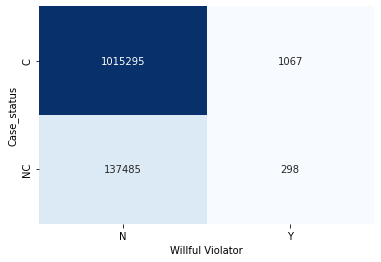

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Create confusion  matrix
le = LabelEncoder()
a = le.fit_transform(data_clean['case_status'])
b = le.fit_transform(data_clean['emp_willful_violator'])  
conf_matrix = confusion_matrix(a,b)

sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=["N", "Y"], yticklabels=["C", "NC"])
plt.xlabel("Willful Violator")
plt.ylabel("Case_status")
plt.show()

In [11]:
def simple_decision_stump_classifier(row):
    if row['emp_willful_violator']=='N':
        return 'C'
    else:
        return 'NC'
    
dec_stump_preds = data_clean.apply(simple_decision_stump_classifier, axis=1)
true = data_clean['case_status']

In [12]:
TP = np.count_nonzero([(true=="C") & (dec_stump_preds=="C")])
FP = np.count_nonzero([(true=="NC") & (dec_stump_preds=="C")])
TN = np.count_nonzero([(true=="NC") & (dec_stump_preds=="NC")])
FN = np.count_nonzero([(true=="C") & (dec_stump_preds=="NC")])

# calculate accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)
print("Accuracy:", accuracy)

# calculate precision
precision = TP / (TP + FP)

# calculate recall
recall = TP / (TP + FN)

# calculate f1 score
f1_score = 2 * precision * recall / (precision + recall)
print("F1 Score:", f1_score)

Accuracy: 0.8799526922527066
F1 Score: 0.936125896783152


In [13]:
emp_case_idx = data_clean.set_index(['emp_name','case_status'])
emp_h1bdep_idx = data_clean.set_index(['emp_name','emp_h1b_dependent'])

case_by_emp = (
            emp_case_idx
            .groupby(['emp_name','case_status'])
            .count()['case_year']
            .unstack()
            .fillna(0)
)

h1bdep_by_emp = (
            emp_case_idx
            .groupby(['emp_name','emp_h1b_dependent'])
            .count()['case_year']
            .unstack()
            .fillna(0)
)

case_by_emp_tots = case_by_emp.sum(axis=1)
emp_case_idx = data_clean.set_index(['emp_name','case_status'])
emp_h1bdep_idx = data_clean.set_index(['emp_name','emp_h1b_dependent'])

case_by_emp = (
            emp_case_idx
            .groupby(['emp_name','case_status'])
            .count()['case_year']
            .unstack()
            .fillna(0)
)

h1bdep_by_emp = (
            emp_case_idx
            .groupby(['emp_name','emp_h1b_dependent'])
            .count()['case_year']
            .unstack()
            .fillna(0)
)

case_by_emp_tots = case_by_emp.sum(axis=1)

In [14]:
case_by_emp.loc['"K" LINE AMERICA']['C']

1.0

case_year  case_status
2015       C              509620
           NC              65248
2017       C              506742
           NC              72535
Name: case_status, dtype: int64


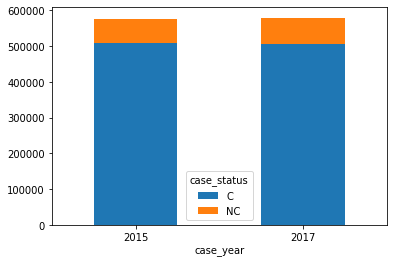

In [15]:
#function for making bar plot of a feature

def makeplot(feature):
    counts = data_clean.groupby(feature)['case_status'].value_counts()
    print(counts)
    counts = counts.unstack()

    ax = counts.plot.bar(stacked=True,rot=0)

    # totals = counts.sum(axis=1)
    # for i, bar in enumerate(ax.containers):
    #     for rect in bar:
    #         # get the height and width of the bar
    #         height = rect.get_height()
    #         width = rect.get_width()
    #         # compute the proportion
    #         prop = height / totals[i]
    #         # add the proportion label
    #         ax.text(rect.get_x() + width / 2, rect.get_y() + height / 2, f'{prop:.0%}', ha='center', va='center')
    
    #         print(i,bar)

    plt.show()

#make plots for 5 features: emp_h1b_dependent, emp_willful_violator, full_time_position, case_year, 
#makeplot('emp_h1b_dependent')
#makeplot('emp_willful_violator')
#makeplot('full_time_position')
makeplot('case_year')  #case year has only two years now, so I don't know what to do about that



In [16]:

#make histogram for prevailing wage




In [17]:
#this is to get a new field, soc_field, that gives us more broad categories of occupations that
#encompass multiple types of jobs

data_clean['soc_field'] = data_clean['soc_code'].str[:2]
data_clean['soc_code'].unique()
#cleaning up the soc_field column
#both of the occupations represented by these letters fall under 15, 
data_clean['soc_field'] = data_clean['soc_field'].replace(['CO', 'SO'], '15') 

#the occupations represented by these letters fall under 17
data_clean['soc_field'] = data_clean['soc_field'].replace(['EL', 'EN', 'ME'], '17')
data_clean['soc_field'] = data_clean['soc_field'].replace('1-', '31') #1- is a 

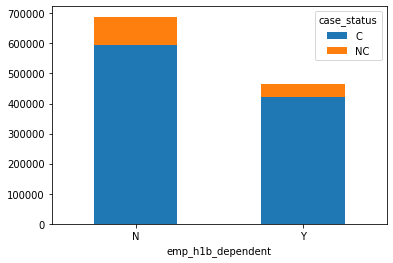

In [18]:
data_clean['case_status'] = data_clean['case_status'].replace(['W','D','CW'],'NC')
counts = data_clean.groupby('emp_h1b_dependent')['case_status'].value_counts()
counts = counts.unstack()
ax = counts.plot.bar(stacked=True,rot=0)

plt.show()

In [19]:
data_clean.groupby('emp_name')['case_status'].value_counts().unstack().fillna(0)

case_status,C,NC
emp_name,,
"""K"" LINE AMERICA",1.0,0.0
"""K"" LINE AMERICA, INC.",1.0,0.0
&TV COMMUNICATIONS INC,1.0,2.0
&TV COMMUNICATIONS INC.,3.0,2.0
'K' LINE LOGISTICS USA INC.,1.0,0.0
...,...,...
ZZ VENTURES INC,0.0,2.0
ZZ VENTURES INC.,4.0,0.0
ÈZE BULLES DRINKS LLC,1.0,0.0


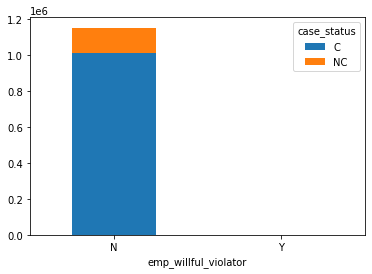

In [20]:
counts = data_clean.groupby('emp_willful_violator')['case_status'].value_counts()
counts = counts.unstack()
ax = counts.plot.bar(stacked=True,rot=0)
plt.show()

In [21]:
data_final = data_clean

In [22]:
conversion_factors = {'Y':1,'H':2080,'M':12,'W':52,'BW':26}
data_final['pw_yearly'] = (
        data_final.apply(lambda row: row['prevailing_wage'] * conversion_factors[row['pw_unit']], axis=1)
                           )


In [23]:
data_final['wage_from_yearly'] = (
    data_final.apply(lambda row: row['wage_from'] 
    * conversion_factors[row['wage_unit']], axis=1)
                                  )

In [24]:
wage_diff = (
    (
    data_final['pw_yearly']-data_final['wage_from_yearly']
     )/data_final['wage_from_yearly']
    )*1.0

wage_diff.describe()

count    1.154144e+06
mean              inf
std               NaN
min     -1.000000e+00
25%     -1.549286e-01
50%     -5.290000e-02
75%      0.000000e+00
max               inf
dtype: float64

In [25]:
data['case_status'] = data['case_status'].replace(['W','D','CW'],'NC')
data['case_status'].value_counts(normalize=True)


C     0.873562
NC    0.126438
Name: case_status, dtype: float64

In [26]:
data_final.head()

,case_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,job_title,soc_code,...,pw_unit,wage_from,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator,soc_field,pw_yearly,wage_from_yearly
0,2017,C,2017-02-06,2017-02-10,"LAKELANDS NEPHROLOGY, PA",GREENWOOD,SC,29646,NEPHROLOGIST,29-1063,...,Y,190000.00,Y,ABBEVILLE,SC,N,N,29,187200.0,190000.00
1,2017,C,2017-03-21,2017-03-27,UNIVERSITY OF IDAHO,MOSCOW,ID,83844,POST DOCTORAL FELLOW,19-1013,...,Y,47507.00,Y,ABERDEEN,ID,N,N,19,39957.0,47507.00
2,2017,C,2017-03-17,2017-03-23,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,27265,OPERATION ANALYST,15-2031,...,Y,65000.00,Y,ABERDEEN,MD,N,N,15,59966.0,65000.00
3,2017,C,2017-03-10,2017-03-16,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,03431,SR. INDUSTRIAL ENGINEER,17-2112,...,Y,86988.15,Y,ABERDEEN,MD,N,N,17,78832.0,86988.15
4,2017,C,2017-08-04,2017-08-10,SANFORD CLINIC,SIOUX FALLS,SD,57117,HEMATOLOGIST/ONCOLOGIST,29-1069,...,Y,450000.00,Y,ABERDEEN,SD,N,N,29,169645.0,450000.00


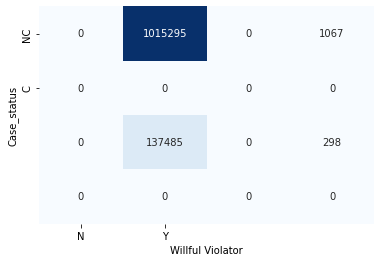

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Create confusion  matrix
a = data_clean['case_status']
b = data_clean['emp_willful_violator']
conf_matrix = confusion_matrix(a,b)

sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=["N", "Y"], yticklabels=["NC", "C"])
plt.xlabel("Willful Violator")
plt.ylabel("Case_status")
plt.show()

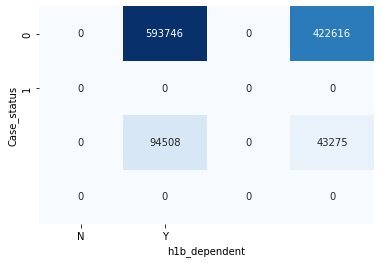

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Create confusion  matrix
a = data_clean['case_status']
b = data_clean['emp_h1b_dependent']
conf_matrix = confusion_matrix(a,b)

sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=["N", "Y"], yticklabels=["0", "1"])
plt.xlabel("h1b_dependent")
plt.ylabel("Case_status")
plt.show()

In [29]:
data_final['application_duration'] = (data_clean['decision_date'] - data_clean['case_submitted']).dt.days
data_final.head()

,case_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,emp_zip,job_title,soc_code,...,wage_from,wage_unit,work_city,work_state,emp_h1b_dependent,emp_willful_violator,soc_field,pw_yearly,wage_from_yearly,application_duration
0,2017,C,2017-02-06,2017-02-10,"LAKELANDS NEPHROLOGY, PA",GREENWOOD,SC,29646,NEPHROLOGIST,29-1063,...,190000.00,Y,ABBEVILLE,SC,N,N,29,187200.0,190000.00,4
1,2017,C,2017-03-21,2017-03-27,UNIVERSITY OF IDAHO,MOSCOW,ID,83844,POST DOCTORAL FELLOW,19-1013,...,47507.00,Y,ABERDEEN,ID,N,N,19,39957.0,47507.00,6
2,2017,C,2017-03-17,2017-03-23,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,27265,OPERATION ANALYST,15-2031,...,65000.00,Y,ABERDEEN,MD,N,N,15,59966.0,65000.00,6
3,2017,C,2017-03-10,2017-03-16,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,03431,SR. INDUSTRIAL ENGINEER,17-2112,...,86988.15,Y,ABERDEEN,MD,N,N,17,78832.0,86988.15,6
4,2017,C,2017-08-04,2017-08-10,SANFORD CLINIC,SIOUX FALLS,SD,57117,HEMATOLOGIST/ONCOLOGIST,29-1069,...,450000.00,Y,ABERDEEN,SD,N,N,29,169645.0,450000.00,6


In [34]:
data_final.columns

Index(['case_year', 'case_status', 'case_submitted', 'decision_date',
       'emp_name', 'emp_city', 'emp_state', 'emp_zip', 'job_title', 'soc_code',
       'full_time_position', 'prevailing_wage', 'pw_unit', 'wage_from',
       'wage_unit', 'work_city', 'work_state', 'emp_h1b_dependent',
       'emp_willful_violator', 'soc_field', 'pw_yearly', 'wage_from_yearly',
       'application_duration', 'location'],
      dtype='object')

In [43]:
def get_location_from_zip(zip_code):
    if not zip_code.isnumeric() or len(zip_code) < 5:
        return "Unknown"
    region_code = int(zip_code[0])
    if region_code == 0 or region_code == 1:
        return "Northeast"
    elif region_code == 7 or region_code == 3 or region_code == 2:
        return "South"
    elif region_code == 4 or region_code == 5 or region_code == 6:
        return "Midwest"
    elif region_code == 8 or region_code == 9:
        return "West"
    else:
        return "Unknown"

data_final['location'] = data_clean['emp_zip'].apply(get_location_from_zip)

drop_cols = [
     "emp_zip",
    "pw_unit", 
    "wage_unit",
    "work_city",
  "work_state",
]

#data_final = data_final.drop(drop_cols, axis=1) 
data_final.head()

,case_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,job_title,soc_code,full_time_position,prevailing_wage,wage_from,emp_h1b_dependent,emp_willful_violator,soc_field,pw_yearly,wage_from_yearly,application_duration,location
0,2017,C,2017-02-06,2017-02-10,"LAKELANDS NEPHROLOGY, PA",GREENWOOD,SC,NEPHROLOGIST,29-1063,Y,187200.0,190000.00,N,N,29,187200.0,190000.00,4,South
1,2017,C,2017-03-21,2017-03-27,UNIVERSITY OF IDAHO,MOSCOW,ID,POST DOCTORAL FELLOW,19-1013,Y,39957.0,47507.00,N,N,19,39957.0,47507.00,6,West
2,2017,C,2017-03-17,2017-03-23,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,OPERATION ANALYST,15-2031,Y,59966.0,65000.00,N,N,15,59966.0,65000.00,6,South
3,2017,C,2017-03-10,2017-03-16,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,SR. INDUSTRIAL ENGINEER,17-2112,Y,78832.0,86988.15,N,N,17,78832.0,86988.15,6,Northeast
4,2017,C,2017-08-04,2017-08-10,SANFORD CLINIC,SIOUX FALLS,SD,HEMATOLOGIST/ONCOLOGIST,29-1069,Y,169645.0,450000.00,N,N,29,169645.0,450000.00,6,Midwest


In [46]:
data_final = data_final.replace('Y',1).replace('N',0)
data_final.head()

,case_year,case_status,case_submitted,decision_date,emp_name,emp_city,emp_state,job_title,soc_code,full_time_position,prevailing_wage,wage_from,emp_h1b_dependent,emp_willful_violator,soc_field,pw_yearly,wage_from_yearly,application_duration,location
0,2017,C,2017-02-06,2017-02-10,"LAKELANDS NEPHROLOGY, PA",GREENWOOD,SC,NEPHROLOGIST,29-1063,1,187200.0,190000.00,0,0,29,187200.0,190000.00,4,South
1,2017,C,2017-03-21,2017-03-27,UNIVERSITY OF IDAHO,MOSCOW,ID,POST DOCTORAL FELLOW,19-1013,1,39957.0,47507.00,0,0,19,39957.0,47507.00,6,West
2,2017,C,2017-03-17,2017-03-23,"XPO SUPPLY CHAIN, INC.",HIGH POINT,NC,OPERATION ANALYST,15-2031,1,59966.0,65000.00,0,0,15,59966.0,65000.00,6,South
3,2017,C,2017-03-10,2017-03-16,"C AND S WHOLESALE GROCERS, INC.",KEENE,NH,SR. INDUSTRIAL ENGINEER,17-2112,1,78832.0,86988.15,0,0,17,78832.0,86988.15,6,Northeast
4,2017,C,2017-08-04,2017-08-10,SANFORD CLINIC,SIOUX FALLS,SD,HEMATOLOGIST/ONCOLOGIST,29-1069,1,169645.0,450000.00,0,0,29,169645.0,450000.00,6,Midwest


In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (StandardScaler, Binarizer, LabelEncoder, OneHotEncoder)

X=data_final[[c for c in data_final.columns if c!='case_status']]

y=data_final['case_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss_col = [
    'wage_from_yearly',
    'pw_yearly',
    'application_duration'
]

bin_col = [
    "emp_h1b_dependent",
    "emp_willful_violator",
    "full_time_position"
]

label_col = [
    "case_year",
    "case_submitted",
    "decision_date"
]

oneh_col = [
    "soc_field",
    "emp_name",
    "location",
]

nb = GaussianNB()

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ss_col),
        ('bin', Binarizer(), bin_col),
        ('label', LabelEncoder(), label_col),
        ('oneh', OneHotEncoder(handle_unknown='ignore'), oneh_col)
    ]
)

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', nb)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the testing data
accuracy = pipeline.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


TypeError: fit_transform() takes 2 positional arguments but 3 were given

# Proposed Solution

Our approach to solving our classification problem will be to generate multiple models, refine those models’ hyperparameters, and then select the best model for final prediction evaluation based on test data unseen by any of the models to see generalization performance. We will first do an 80-20 train(/valid)-test split to allow for better model evaluation later since our dataset is so large. To solve our classification problem we will use several models from SciKit Learn and select the best model after finding the best hyperparameters for each of the models using gridsearch. The models we have in mind for classification are Random Forest, Logistic Regression, SVM, and KNN. Since we do not know the distribution of our high dimensional dataspace, we will be thinking of these models but our decision may be and will likely be influenced by what we find in our initial EDA of the data and EDA will also provide insight into feature importance. Due to the high dimensionality of the data, PCA will likely need to be performed as dimensionality reduction before being input into training the models to improve performance. Each model’s best hyperparameters will be found using random search and then gridsearch after which each model will be compared against each other by using k-fold cross validation on the train/validation data split (80% of the data). After which each model will be tested on the completely unseen testing data split (20%) to determine generalization performance of each model. Our best resulting model will be selected with a heavy emphasis on generalization performance. We will be aiming to have better performance than the performance of previous H-1B prediction algorithms we found and will find in our research- the best of which we have seen has an accuracy of 96% for example. 

# Ethics & Privacy

There are several ethics and privacy concerns with the dataset we have chosen regarding H1-B Non Immigrant Labour Visa. The dataset that we have is anonymous, however, with the features described, employees could be re-identified, as the dataset contains information regarding the city, state, and zip code of both the employer and employee. However, to address this, we will refrain from using information of the employee in our project. The dataset also avoids proxy discrimination, as we are not using features such as race, origin, sex, and age, rather using attributes from the company. As far as bias, since we are mainly going to be using columns regarding the employer and the case status, and disregarding columns related to the employee. As we are reducing the number of columns used, we could be missing some potential variables that could lead to biased predictions in our results regarding the approval of visas. To address this, we will choose models that are less prone to bias and use evaluation metrics that mitigate bias.

# Team Expectations 

* Team Expectation 1: Communication
    * If you have an issue or are confused about something, let one of us or all of us know so we can figure it out together.
* Team Expectation 2: Presence
    * When the team is meeting, we understand that not everyone can meet in-person/at the same time, but we expect that the members who cannot make it are active on the doc, and keeping up with what is being discussed.
* Team Expectation 3: Schedule
    * We are aiming to stick to the schedule we have made and agreed upon and are expecting everyone to follow and hold each other accountable.
* Team Expectation 4: Being Active
    * We expect all team members to check our discord group and Google Docs.

# Project Timeline Proposal


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/27  |  9 AM|  Peer Review Proposal DUE  | Wrap up Peer Review Proposals, discuss feature selections and find dataset that contains metrics needed for employers | 
| 3/1  |  9 AM |  Find Dataset for metrics with Employers | Discuss wranging and layout main idea of analytical approach. | 
| 3/3 | 9 AM  | Begin EDA  | Review/Edit wrangling/EDA  <br/> Work on Checkpoint due 3/8 |
| 3/6  | 9 AM | Finish EDA <br/> Work on Checkpoint due 3/8 | Review Final status of EDA and Discuss Analysis Plan <br/> Work on Checkpoint due 3/8|
| 3/8  | 9 AM  | Start Project Code <br/> Checkpoint due TODAY| Discuss/edit project code <br/> Complete project |
| 3/10  | 9 AM  | Complete analysis <br/> Draft results/conclusion/discussion| Discuss/edit full project |
| 3/13  | 9 AM  | Make an outline/checklist of the final project | Discuss any lingering problems/concerns and work on final touches  |
| 3/15 | 9 AM  | Address any lingering problems/concerns and work on final touches| Discuss/Address any lingering problems/concerns and work on final touches |
| 3/17  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="mpinote"></a>1.[^](#mpinote): Migration Policy Institute. (2022). H-1B Temporary Skilled Worker Program. Retrieved February 22, 2023, from https://www.migrationpolicy.org/article/h-1b-temporary-skilled-worker-program.<br> 
<a name="iqbalnote"></a>2.[^](#iqbalnote): M. Tariq Iqbal, M. Irfan Ullah, M. Ahsan Nazir, "A Hybrid Algorithm for Optimal Placement and Sizing of Distributed Generation in a Distribution System", IEEE Access, vol. 7, pp. 174089-174102, 2019. doi: 10.1109/ACCESS.2019.2953292. https://ieeexplore.ieee.org/abstract/document/8933628<br>
<a name="rananote"></a>3.[^](#rananote): Rana, P., Kumar, S., & Yadav, S. (2019). An allotment of H1B work visa in USA using machine learning. International Journal of Recent Technology and Engineering, 8(3S), 539-545. Available from: https://www.researchgate.net/profile/Prashant-Rana-4/publication/328488339_An_allotment_of_H1B_work_visa_in_USA_using_machine_learning/links/5d70f092a6fdcc9961afad48/An-allotment-of-H1B-work-visa-in-USA-using-machine-learning.pdf.<br>
<a name="paulnote"></a>4.[^](#paulnote): Paul, U., & Langlois, A. (2022). Understanding the Determinants of H-1B Decisions: A Machine Learning Approach. Northeastern University, College of Social Sciences and Humanities. Retrieved February 22, 2023, from https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4143882<br>
